In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('../data/bank-full.csv')

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
X = pd.get_dummies(df)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans

In [20]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) ## SSD point --> cluster center

In [21]:
ssd

[2469792.367302056,
 2370786.871245426,
 2271503.2918485496,
 2192021.2976422035,
 2122897.901733489,
 2121885.3835271993,
 2031767.429991351,
 1988001.5468444903]

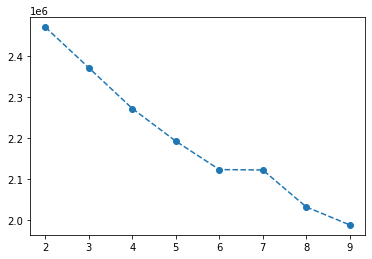

In [22]:
plt.plot(range(2, 10), ssd, 'o--')

In [23]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.192021e+06
4    2.122898e+06
5    2.121885e+06
6    2.031767e+06
7    1.988002e+06
dtype: float64

In [25]:
pd.Series(ssd).diff()

0             NaN
1   -99005.496057
2   -99283.579397
3   -79481.994206
4   -69123.395909
5    -1012.518206
6   -90117.953536
7   -43765.883147
dtype: float64